<img src="./images/banner.png" width="800">

# Other GLMs for Classification

Welcome to our exploration of Generalized Linear Models (GLMs) in the context of classification! In this section, we'll briefly recap what we've learned about GLMs and see how they extend beyond logistic regression to solve various classification problems.


As we've seen, GLMs consist of three main components:

1. **Random Component:** This specifies the probability distribution of the target variable.
2. **Systematic Component:** This is the linear combination of predictors.
3. **Link Function:** This connects the random and systematic components.


Let's refresh our memory with a quick overview:

- In linear regression, we assumed our target variable followed a normal distribution.
- For logistic regression, we switched to a Bernoulli distribution for binary outcomes.
- The link function allowed us to connect these distributions to our linear predictor.


Remember the general form of a GLM:

$g(E[Y|X]) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$

Where $g()$ is our link function, $E[Y|X]$ is the expected value of our target given our predictors, and the right side is our familiar linear combination of predictors.


Now, let's see how GLMs extend beyond what we've already covered:

1. **Flexibility in Distribution:** GLMs allow us to model target variables that follow various distributions from the exponential family. This includes:
   - Normal (as in linear regression)
   - Bernoulli (as in logistic regression)
   - Poisson (for count data)
   - Gamma (for positive, continuous data)
   - And more!

2. **Variety of Link Functions:** Different link functions can be used depending on the problem:
   - Identity link: $g(μ) = μ$ (used in linear regression)
   - Logit link: $g(μ) = log(μ / (1-μ))$ (used in logistic regression)
   - Log link: $g(μ) = log(μ)$ (often used with Poisson regression)
   - Inverse link: $g(μ) = 1/μ$ (used with Gamma regression)

3. **Unified Framework:** GLMs provide a consistent approach to various types of regression and classification problems.


💡 **Pro Tip:** Understanding GLMs as a framework allows you to tackle a wide range of problems with a consistent approach. Once you grasp the core concepts, you can adapt to different scenarios by changing the distribution and link function!


GLMs give us a powerful toolkit for dealing with different types of data and classification problems. By understanding the components of GLMs, we can:

1. Choose appropriate models for different types of target variables.
2. Handle non-linear relationships between predictors and the target.
3. Make valid predictions even when our target variable isn't normally distributed.


For example, imagine you're working on a project to predict the number of customer support tickets a company will receive in a day. This is count data, so a normal distribution might not be appropriate. With your knowledge of GLMs, you might consider using Poisson regression, which is designed for count data.


In the following sections, we'll dive into specific types of GLMs beyond logistic regression, seeing how they can be applied to various classification problems. We'll explore probit regression, Poisson regression, multinomial regression, and more, always keeping in mind how these models fit into the broader GLM framework we've established.


❗️ **Important Note:** Remember, the choice of distribution and link function in a GLM should be guided by the nature of your data and the problem you're trying to solve. As we explore different GLMs, think about what types of real-world problems they might be suited for!

**Table of contents**<a id='toc0_'></a>    
- [Multinomial Logistic Regression](#toc1_)    
  - [One-vs-Rest (OvR)](#toc1_1_)    
  - [Softmax Approach](#toc1_2_)    
  - [One-vs-Rest (OvR) vs Softmax](#toc1_3_)    
- [Probit Regression](#toc2_)    
  - [Comparison with Logistic Regression](#toc2_1_)    
  - [Applications and Use Cases](#toc2_2_)    
- [Ordinal Regression](#toc3_)    
  - [How Ordinal Regression Works](#toc3_1_)    
  - [Cumulative Link Models](#toc3_2_)    
  - [Proportional Odds Assumption](#toc3_3_)    
  - [Implementing Ordinal Regression](#toc3_4_)    
- [Choosing the Right GLM for Classification](#toc4_)    
  - [Decision Framework](#toc4_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Multinomial Logistic Regression](#toc0_)

Welcome to the exciting world of multi-class classification! In this section, we'll explore how to extend our binary classification knowledge to handle problems with more than two classes.


Multinomial Logistic Regression is a natural extension of binary logistic regression for multi-class problems.


Imagine you're building a model to classify images of fruits. Instead of just distinguishing between apples and oranges, you now want to classify apples, oranges, bananas, and pears. This is where multinomial logistic regression comes in handy!


There are two main approaches to implementing multinomial logistic regression:

1. **One-vs-Rest (OvR)**
2. **Softmax (also known as multinomial)**

Understanding these approaches helps you choose the right method for your specific problem and interpret the results correctly.

### <a id='toc1_1_'></a>[One-vs-Rest (OvR)](#toc0_)


One-vs-Rest (OvR) is a strategy that involves training a separate binary classifier for each class in a multi-class problem.

1. For a problem with K classes, OvR trains K binary classifiers.
2. Each classifier is trained to distinguish one class from all others.
3. During prediction, all K classifiers are run on the input, and the class with the highest confidence score is chosen.

<img src="./images/one-vs-rest.png" width="800">

<img src="./images/one-vs-rest.jpg" width="800">

Let's visualize this concept using the Iris dataset:


In [2]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
iris = load_iris()
X = iris.data[:, [0, 1]]  # We'll use sepal length and sepal width
y = iris.target

In [4]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Train OvR model
ovr_clf = OneVsRestClassifier(LogisticRegression(random_state=42))
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(random_state=42))

In [5]:
X_train.shape

(105, 2)

In [6]:
ovr_clf.estimators_[0].coef_, ovr_clf.estimators_[1].coef_, ovr_clf.estimators_[2].coef_

(array([[-2.92692376,  1.90867906]]),
 array([[ 0.06583511, -1.43300872]]),
 array([[ 1.79151475, -0.1236019 ]]))

In [7]:
ovr_clf.classes_

array([0, 1, 2])

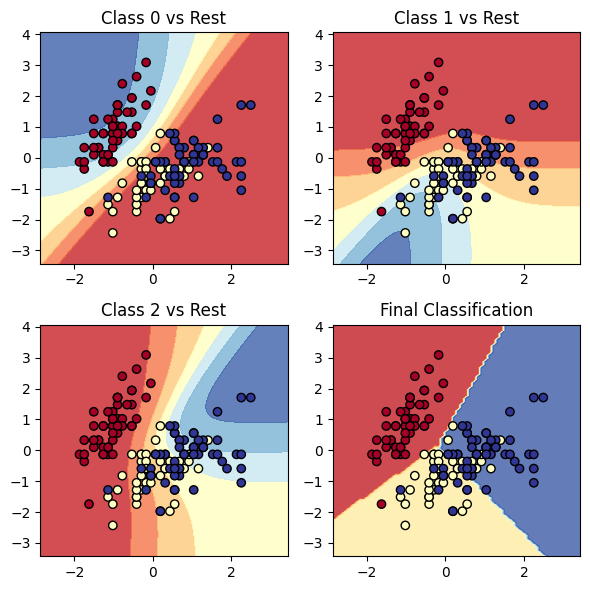

In [8]:
# Plotting function
def plot_ovr_decision_boundaries(X, y, clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    f, axarr = plt.subplots(2, 2, figsize=(6, 6))

    for idx, ax in enumerate(axarr.ravel()):
        if idx < 3:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, idx]
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
            ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor="black")
            ax.set_title(f"Class {idx} vs Rest")
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
            ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor="black")
            ax.set_title("Final Classification")

    plt.tight_layout()
    plt.show()

plot_ovr_decision_boundaries(X_scaled, y, ovr_clf)

💡 **Pro Tip:** Notice how each binary classifier creates a single decision boundary, and the final classification is determined by combining these boundaries.


This visualization shows:
- Three subplots for each binary classifier (one class vs. the rest)
- One subplot for the final classification


One-vs-Rest is a simple and intuitive approach to multi-class classification. Here are some of its pros and cons:

1. **Simplicity**: Easy to understand and implement.
2. **Efficiency**: Can be more computationally efficient, especially with a large number of classes.
3. **Interpretability**: Each classifier's coefficients directly relate to one class.

Cons of One-vs-Rest:
1. **Imbalanced Training**: Each classifier deals with an imbalanced dataset (one class vs. all others).
2. **Ambiguous Regions**: Can lead to ambiguous regions where multiple classifiers claim the instance.
3. **Inability to Capture Class Relationships**: Treats all other classes equally, which may not always be appropriate.


Let's create a more intuitive visualization that shows how the probabilities for each class change across the feature space:


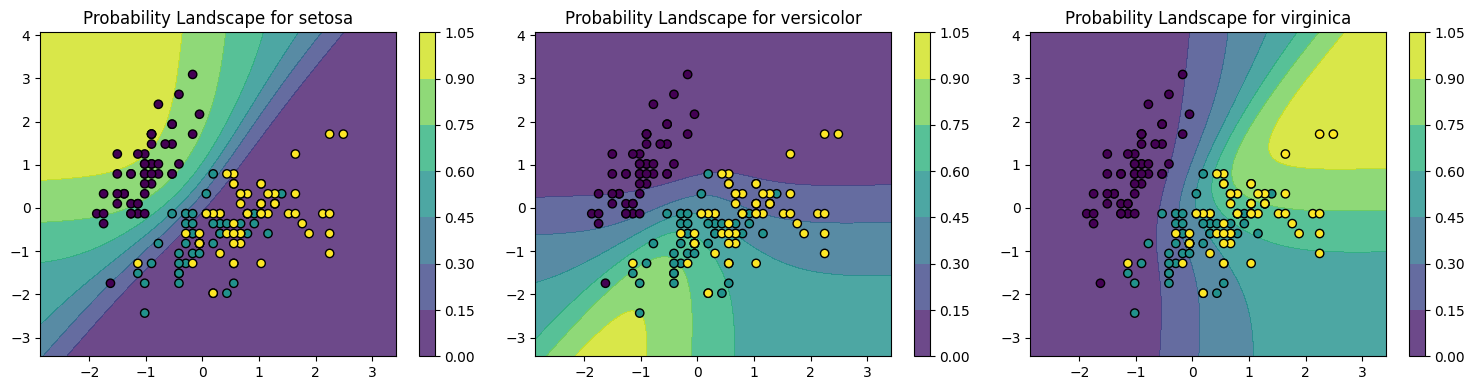

In [9]:
def plot_probability_landscapes(X, y, clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    f, axarr = plt.subplots(1, 3, figsize=(15, 4))

    for idx, ax in enumerate(axarr.ravel()):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, idx]
        Z = Z.reshape(xx.shape)

        c = ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.viridis)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, edgecolor="black")
        ax.set_title(f"Probability Landscape for {iris.target_names[idx]}")
        f.colorbar(c, ax=ax)

    plt.tight_layout()
    plt.show()


plot_probability_landscapes(X_scaled, y, ovr_clf)

This visualization shows:
- How the probability of each class changes across the feature space
- Where the model is most confident and where it's uncertain


❗️ **Important Note:** Observe the regions where probabilities overlap. These are areas where the OvR approach might face challenges in making clear distinctions between classes.


One-vs-Rest is a powerful and intuitive approach to multi-class classification. While it has its limitations, it often performs well in practice and is especially useful when you need to understand the specific factors that distinguish each class from the others.


In our next section, we'll compare this approach with the Softmax method and discuss scenarios where each might be preferable.

### <a id='toc1_2_'></a>[Softmax Approach](#toc0_)


💡 **Pro Tip:** The softmax function is the key to extending logistic regression to multi-class problems.


The softmax function, also known as the normalized exponential function, is defined as:

$$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}$$


Let's visualize the softmax function:


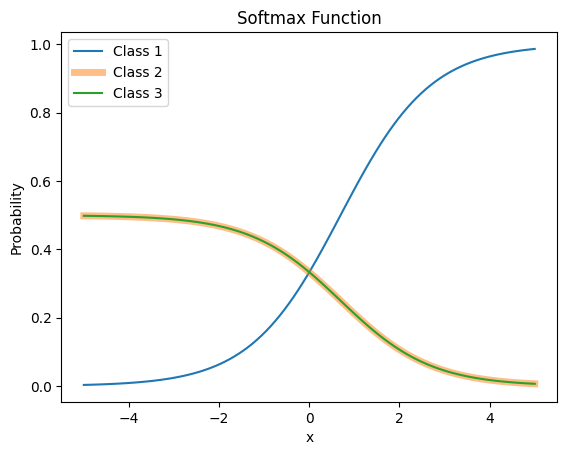

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)


# Generate sample data
x = np.linspace(-5, 5, 100)
y1 = softmax(np.vstack([x, np.zeros_like(x), np.zeros_like(x)]))

plt.plot(x, y1[0], label="Class 1")
plt.plot(x, y1[1], label="Class 2", alpha=0.5, linewidth=5)
plt.plot(x, y1[2], label="Class 3")
plt.title("Softmax Function")
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend()

This plot shows how the softmax function distributes probabilities among three classes as the input for one class varies.


In multinomial logistic regression, we model the probability of an instance belonging to each of the $K$ classes. For each class $k$, we calculate:

$$P(Y=k|X) = \frac{e^{X\beta_k}}{\sum_{j=1}^K e^{X\beta_j}}$$

Where:
- $X$ is the input feature vector
- $\beta_k$ is the coefficient vector for class $k$
- $K$ is the total number of classes


<img src="./images/softmax.png" width="800">

This function takes a vector of $K$ real numbers and normalizes it into a probability distribution.


The Softmax approach directly extends logistic regression to handle multiple classes simultaneously, using the softmax function as the link function:

1. Instead of training separate binary classifiers, softmax trains a single multi-class model.
2. It uses the softmax function to convert raw scores into probabilities for each class.
3. The softmax function ensures that the probabilities for all classes sum to 1.

Let's visualize this concept using the Iris dataset:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and prepare the Iris dataset
iris = load_iris()
X = iris.data[:, [0, 1]]  # We'll use sepal length and sepal width
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Train Softmax model
softmax_clf = LogisticRegression()
softmax_clf.fit(X_train, y_train)

LogisticRegression()

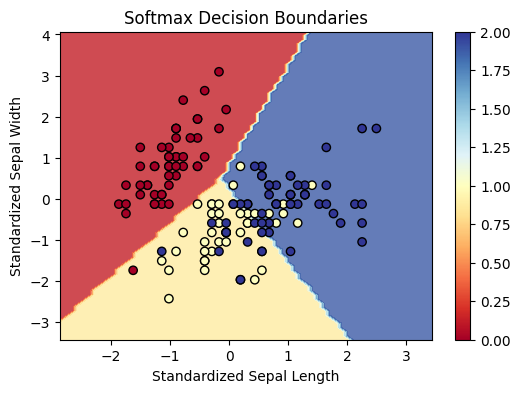

In [11]:
# Plotting function
def plot_softmax_decision_boundary(X, y, clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor="black")
    plt.title("Softmax Decision Boundaries")
    plt.xlabel("Standardized Sepal Length")
    plt.ylabel("Standardized Sepal Width")
    plt.colorbar()
    plt.show()


plot_softmax_decision_boundary(X_scaled, y, softmax_clf)

Notice how the softmax approach creates smooth decision boundaries between all classes simultaneously.


Softmax has several advantages:

1. **Natural Multi-class Extension**: Directly models the probability of each class.
2. **Smooth Probability Transitions**: Provides smooth transitions between class probabilities.
3. **Efficient for Many Classes**: Uses a single model regardless of the number of classes.

However, it also has some drawbacks:
1. **Computational Complexity**: Can be more computationally intensive than OvR, especially with many features.
2. **Less Interpretable**: Coefficients are less directly interpretable compared to binary logistic regression.


In [12]:
print(f"Softmax Accuracy: {softmax_clf.score(X_test, y_test):.4f}")

Softmax Accuracy: 0.8222


In [13]:
softmax_clf.coef_

array([[-2.3203918 ,  1.32028183],
       [ 0.61047906, -0.96240838],
       [ 1.70991274, -0.35787345]])

❗️ **Important Note:** While both approaches often yield similar results, the softmax approach generally provides smoother decision boundaries and more natural probability estimates for multi-class problems.


In practice, the choice between OvR and softmax depends on factors like the number of classes, computational resources, and the specific problem at hand. Experiment with both to see which works best for your dataset!

### <a id='toc1_3_'></a>[One-vs-Rest (OvR) vs Softmax](#toc0_)

Imagine you're a judge in a flower competition with three categories: Setosa, Versicolor, and Virginica. Your job is to classify flowers based on their sepal length and width.

OvR is like having three separate experts, each specializing in identifying one type of flower. In the OvR approach:

1. You have three expert judges:
   - Judge A is an expert at identifying Setosa flowers.
   - Judge B is an expert at identifying Versicolor flowers.
   - Judge C is an expert at identifying Virginica flowers.

2. When a new flower arrives:
   - Judge A says: "I'm 80% sure this is a Setosa."
   - Judge B says: "I'm 30% sure this is a Versicolor."
   - Judge C says: "I'm 40% sure this is a Virginica."

3. You classify the flower based on the highest confidence score. In this case, you'd classify it as Setosa.

💡 **Pro Tip:** This approach works well when each flower type has distinct features that set it apart from the others.

On the other hand, Softmax is like having a single expert judge who considers all flower types simultaneously and distributes probability among them. In the Softmax approach:

1. You have one expert judge who is knowledgeable about all flower types.

2. When a new flower arrives, the judge considers all possibilities at once and says:
   "Based on what I see, I'd say there's:
   - 70% chance it's a Setosa
   - 20% chance it's a Versicolor
   - 10% chance it's a Virginica"

3. You classify the flower based on the highest probability. In this case, you'd classify it as Setosa.

🤔 **Why This Matters:** This approach can capture more nuanced relationships between classes, as the judge is considering all options simultaneously.


Key Differences

1. **Decision Making:**
   - OvR: Makes multiple binary decisions
   - Softmax: Makes a single multi-class decision

2. **Probability Interpretation:**
   - OvR: Confidence scores may not sum to 1
   - Softmax: Probabilities always sum to 1

3. **Class Relationships:**
   - OvR: Treats each class independently
   - Softmax: Considers relationships between classes

❗️ **Important Note:** In practice, both methods often perform similarly, but Softmax tends to provide more intuitive probability estimates and can capture more complex class relationships.


By understanding these approaches intuitively, you can better choose the right method for your specific classification problem and interpret the results more effectively.

## <a id='toc2_'></a>[Probit Regression](#toc0_)

Probit regression is another powerful tool in our GLM toolkit, particularly useful for binary classification problems. "Probit" is a portmanteau (combination) of the words "probability" and "unit." The term was coined by Chester Ittner Bliss, an American entomologist and statistician, in 1934. Bliss introduced the term in his work on analyzing the effectiveness of insecticides. He was studying how the dosage of an insecticide related to the proportion of insects killed. A "probit" essentially represents a probability unit on a scaled version of the normal probability curve.

Let's dive into this model and see how it compares to our familiar logistic regression.

The probit model uses the inverse of the cumulative distribution function (CDF) of the standard normal distribution as its link function.


In mathematical terms, the probit link function is:

$$g(\mu) = \Phi^{-1}(\mu)$$

Where $\Phi^{-1}$ is the inverse of the standard normal CDF, also known as the probit function.


Let's visualize the standard normal CDF and its inverse (the probit function):


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

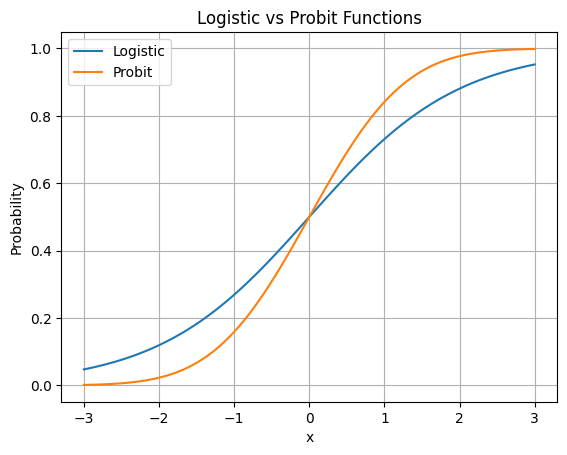

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 100)
logistic = 1 / (1 + np.exp(-x))
probit = stats.norm.cdf(x)

plt.plot(x, logistic, label="Logistic")
plt.plot(x, probit, label="Probit")
plt.legend()
plt.title("Logistic vs Probit Functions")
plt.xlabel("x")
plt.ylabel("Probability")
plt.grid(True)

The probit model assumes that there's an underlying latent variable $Z$ that follows a standard normal distribution. We observe a binary outcome $Y$ based on whether $Z$ exceeds a certain threshold.


In the probit model, the probability of success (Y = 1) is given by:

$P(Y = 1|X) = \Phi(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p)$

Where $\Phi$ is the CDF of the standard normal distribution.


Let's say we have a probit model: $\Phi^{-1}(p) = -2 + 0.5X$

- If X = 0, then $\Phi^{-1}(p) = -2$, so $p = \Phi(-2) \approx 0.023$
- If X = 4, then $\Phi^{-1}(p) = 0$, so $p = \Phi(0) = 0.5$
- If X = 10, then $\Phi^{-1}(p) = 3$, so $p = \Phi(3) \approx 0.999$

Let's visualize this concept:


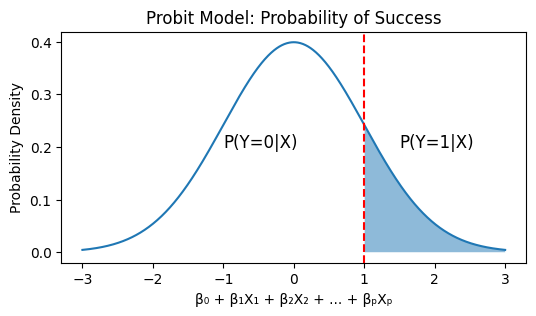

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x)

plt.figure(figsize=(6, 3))
plt.plot(x, y)
plt.fill_between(x, y, where=(x > 1), alpha=0.5)
plt.axvline(1, color="r", linestyle="--")
plt.text(1.5, 0.2, "P(Y=1|X)", fontsize=12)
plt.text(-1, 0.2, "P(Y=0|X)", fontsize=12)
plt.title("Probit Model: Probability of Success")
plt.xlabel("β₀ + β₁X₁ + β₂X₂ + ... + βₚXₚ")
plt.ylabel("Probability Density")
plt.show()

💡 **Pro Tip:** While the math might look intimidating, conceptually, probit regression is very similar to logistic regression. The key difference is in the link function used!


### <a id='toc2_1_'></a>[Comparison with Logistic Regression](#toc0_)


Let's compare probit regression with our familiar logistic regression:

1. **Link Function:** 
   - Logistic: Uses the logit function $\log(\frac{\mu}{1-\mu})$
   - Probit: Uses the inverse normal CDF $\Phi^{-1}(\mu)$

2. **Interpretation:**
   - Logistic: Coefficients represent changes in log-odds
   - Probit: Coefficients represent changes in z-scores

3. **Tail Behavior:**
   - Logistic: Has slightly heavier tails
   - Probit: Tails approach zero more quickly


Let's visualize the logistic and probit functions side by side:


### <a id='toc2_2_'></a>[Applications and Use Cases](#toc0_)


Probit regression is widely used in various fields:

1. **Economics and Finance:** 
   - Predicting the probability of loan default
   - Modeling consumer choices in marketing research

2. **Social Sciences:**
   - Analyzing voting behavior
   - Studying factors influencing educational attainment

3. **Biostatistics:**
   - Dose-response models in toxicology
   - Analyzing binary outcomes in clinical trials

4. **Quality Control:**
   - Estimating the probability of product defects


🤔 **Why This Matters:** The choice between logistic and probit regression often comes down to tradition in your field or specific modeling needs. Understanding both gives you flexibility in your analysis approach.


Let's visualize a simple example of probit regression in action:


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from statsmodels.discrete.discrete_model import Probit
import statsmodels.api as sm

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 1]  # We'll use only the sepal length
y = (iris.target == 0).astype(int)  # 1 if Iris-Setosa, 0 otherwise

# Create a DataFrame
df = pd.DataFrame({"sepal_length": X, "is_setosa": y})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Add constant term to X
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

X_train.shape

(105, 2)

In [18]:
X_train

array([[1. , 2.4],
       [1. , 2.8],
       [1. , 3.1],
       [1. , 3. ],
       [1. , 3.6],
       [1. , 2.9],
       [1. , 3. ],
       [1. , 3. ],
       [1. , 3.5],
       [1. , 2.8],
       [1. , 2.7],
       [1. , 3.4],
       [1. , 3.5],
       [1. , 3.8],
       [1. , 2. ],
       [1. , 2.7],
       [1. , 3.4],
       [1. , 3. ],
       [1. , 3.3],
       [1. , 2.7],
       [1. , 3.4],
       [1. , 3. ],
       [1. , 3.8],
       [1. , 3.2],
       [1. , 2.9],
       [1. , 2.5],
       [1. , 4.2],
       [1. , 3. ],
       [1. , 2.7],
       [1. , 2.2],
       [1. , 3. ],
       [1. , 3.4],
       [1. , 2.3],
       [1. , 3.9],
       [1. , 2.3],
       [1. , 2.7],
       [1. , 3.3],
       [1. , 3.2],
       [1. , 2.4],
       [1. , 3. ],
       [1. , 3.1],
       [1. , 2.8],
       [1. , 3.4],
       [1. , 3.5],
       [1. , 3.2],
       [1. , 2.5],
       [1. , 3.2],
       [1. , 2.7],
       [1. , 2.6],
       [1. , 3. ],
       [1. , 2.5],
       [1. , 2.9],
       [1. ,

In [19]:
# Fit Probit model
probit_model = Probit(y_train, X_train)
probit_results = probit_model.fit()

Optimization terminated successfully.
         Current function value: 0.418202
         Iterations 6


In [20]:
logistic_model = sm.Logit(y_train, X_train)
logistic_results = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.410869
         Iterations 7


In [21]:
# Print summary
print(probit_results.summary())

                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                  105
Model:                         Probit   Df Residuals:                      103
Method:                           MLE   Df Model:                            1
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:                  0.3108
Time:                        10:27:54   Log-Likelihood:                -43.911
converged:                       True   LL-Null:                       -63.711
Covariance Type:            nonrobust   LLR p-value:                 3.116e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.1257      1.472     -5.522      0.000     -11.010      -5.242
x1             2.4535      0.468      5.238      0.000       1.535       3.372


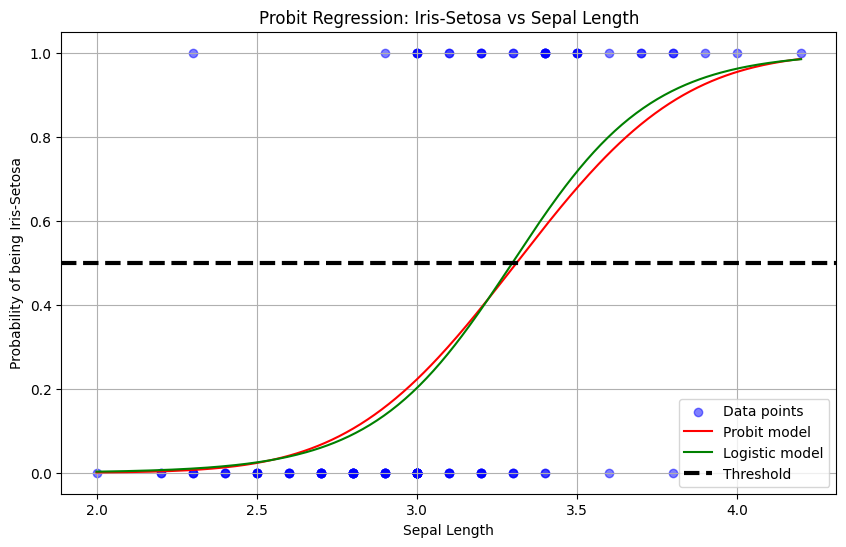

In [22]:
# Visualize the data and the model
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 1], y_train, color="blue", alpha=0.5, label="Data points")
plt.xlabel("Sepal Length")
plt.ylabel("Probability of being Iris-Setosa")
plt.title("Probit Regression: Iris-Setosa vs Sepal Length")

# Generate points for the fitted curve
X_range = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 300)
X_range_const = sm.add_constant(X_range)
y_pred = probit_results.predict(X_range_const)
y_pred_logistic = logistic_results.predict(X_range_const)

plt.plot(X_range, y_pred, color="red", label="Probit model")
plt.plot(X_range, y_pred_logistic, color="green", label="Logistic model")
plt.axhline(0.5, color="black", linestyle="--", label="Threshold", linewidth=3)
plt.legend()
plt.grid(True)

❗️ **Important Note:** While logistic and probit regressions often give similar results, probit can be more appropriate when you believe the underlying process follows a normal distribution. Always consider the nature of your data and problem when choosing between them!


This revised version includes more visualizations to help explain the concepts, and uses LaTeX for mathematical formulas. The added plots should help readers better understand the probit function, its relationship to the normal distribution, and how it compares to logistic regression.

## <a id='toc3_'></a>[Ordinal Regression](#toc0_)

Ordinal regression is used when the target variable is categorical with a clear, meaningful order. Imagine you're developing a model to predict customer satisfaction levels:
1. Very Unsatisfied
2. Unsatisfied
3. Neutral
4. Satisfied
5. Very Satisfied


Notice how these categories have a clear order. Unlike multinomial logistic regression, which treats all classes as unordered, ordinal regression takes this ordering into account.


💡 **Pro Tip:** Ordinal regression is particularly useful in scenarios like rating predictions, severity assessments, or any situation where the outcome has ranked categories.


### <a id='toc3_1_'></a>[How Ordinal Regression Works](#toc0_)


Ordinal regression models the cumulative probabilities of the ordered categories. Instead of predicting the probability of each category directly, it predicts the probability of being in a particular category or any category below it.


The model uses a series of threshold points (also called cut points or intercepts) to divide the continuous latent variable into ordered categories.


Let's visualize this concept:


Text(0, 0.5, 'Density')

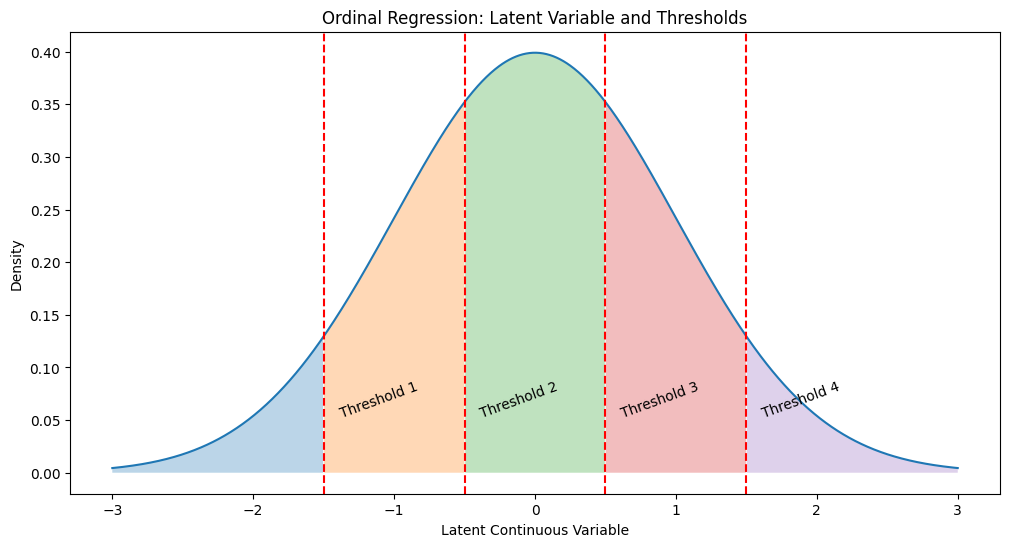

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the thresholds
thresholds = [-1.5, -0.5, 0.5, 1.5]
categories = [
    "Very Unsatisfied",
    "Unsatisfied",
    "Neutral",
    "Satisfied",
    "Very Satisfied",
]

# Create a range of values
x = np.linspace(-3, 3, 1000)
y = norm.pdf(x, 0, 1)

# Plot the distribution and thresholds
plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.fill_between(x, y, where=(x < thresholds[0]), alpha=0.3)
plt.fill_between(x, y, where=((x >= thresholds[0]) & (x < thresholds[1])), alpha=0.3)
plt.fill_between(x, y, where=((x >= thresholds[1]) & (x < thresholds[2])), alpha=0.3)
plt.fill_between(x, y, where=((x >= thresholds[2]) & (x < thresholds[3])), alpha=0.3)
plt.fill_between(x, y, where=(x >= thresholds[3]), alpha=0.3)

for i, thresh in enumerate(thresholds):
    plt.axvline(x=thresh, color="red", linestyle="--")
    plt.text(
        thresh + 0.1, 0.05, f"Threshold {i+1}", rotation=20, verticalalignment="bottom"
    )

plt.title("Ordinal Regression: Latent Variable and Thresholds")
plt.xlabel("Latent Continuous Variable")
plt.ylabel("Density")

### <a id='toc3_2_'></a>[Cumulative Link Models](#toc0_)


Ordinal regression uses cumulative link models. The most common is the proportional odds model, which assumes that the effect of the predictors is the same across different thresholds.


The model can be expressed as:

$$logit(P(Y \leq j)) = \alpha_j - \beta X$$

Where:
- $Y$ is the ordinal outcome
- $j$ is a particular category
- $\alpha_j$ is the threshold for category $j$
- $\beta$ is the vector of coefficients
- $X$ is the vector of predictors


The logit link is symmetric around 0.5 and is often the default choice due to its interpretability in terms of odds ratios. While the proportional odds model (using the logit link) is the most common, there are several other link functions available, each with its own characteristics:

1. **Probit Model**:The probit model uses the inverse of the cumulative standard normal distribution as the link function:

$$\Phi^{-1}(P(Y \leq j)) = \alpha_j - \beta X$$

Where $\Phi^{-1}$ is the inverse of the standard normal cumulative distribution function.


💡 **Pro Tip:** Probit models are often used when the underlying latent variable is assumed to be normally distributed.

2. **Complementary Log-Log Model**: This model uses the complementary log-log (clog-log) link function:

$$\log(-\log(1 - P(Y \leq j))) = \alpha_j - \beta X$$

### <a id='toc3_3_'></a>[Proportional Odds Assumption](#toc0_)


🤔 **Why This Matters:** The proportional odds assumption is crucial in ordinal regression. It assumes that the relationship between any two pairs of outcome groups is statistically the same.


This means the effect of the independent variables is consistent across the different thresholds. If this assumption is violated, you might need to consider alternative models or use multinomial logistic regression instead.


### <a id='toc3_4_'></a>[Implementing Ordinal Regression](#toc0_)


Let's implement an ordinal regression model using the `OrderedModel` from statsmodels:


In [44]:
import pandas as pd
import numpy as np
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [70]:
# Create a sample dataset
np.random.seed(42)
n_samples = 1000

age = np.random.normal(40, 10, n_samples)
income = np.random.normal(30000, 15000, n_samples)


# generate satisfaction in correlation with age and income, higher income and lower age should be more satisfied
satisfaction = np.random.choice(
    ["Very Unsatisfied", "Unsatisfied", "Neutral", "Satisfied", "Very Satisfied"],
    n_samples,
)

for i in range(n_samples):
    if age[i] < 30 and income[i] > 60000:
        satisfaction[i] = np.random.choice(
            ["Very Unsatisfied", "Unsatisfied", "Neutral", "Satisfied", "Very Satisfied"],
            1,
            p=[0.1, 0.2, 0.2, 0.4, 0.1],
        )[0]
    elif age[i] < 30 and income[i] > 60000:
        satisfaction[i] = np.random.choice(
            ["Very Unsatisfied", "Unsatisfied", "Neutral", "Satisfied", "Very Satisfied"],
            1,
            p=[0.1, 0.1, 0.2, 0.2, 0.4],
        )[0]
    elif age[i] > 30 and income[i] > 60000:
        satisfaction[i] = np.random.choice(
            ["Very Unsatisfied", "Unsatisfied", "Neutral", "Satisfied", "Very Satisfied"],
            1,
            p=[0.1, 0.1, 0.2, 0.3, 0.3],
        )[0]
    elif age[i] > 30 and income[i] < 60000:
        satisfaction[i] = np.random.choice(
            ["Very Unsatisfied", "Unsatisfied", "Neutral", "Satisfied", "Very Satisfied"],
            1,
            p=[0.4, 0.3, 0.2, 0.05, 0.05],
        )[0]
    else:
        satisfaction[i] = np.random.choice(
            ["Very Unsatisfied", "Unsatisfied", "Neutral", "Satisfied", "Very Satisfied"],
            1,
            p=[0.1, 0.1, 0.6, 0.1, 0.1],
        )[0]


In [71]:
# Convert satisfaction to ordered categories
satisfaction_order = pd.Categorical(
    satisfaction,
    categories=[
        "Very Unsatisfied",
        "Unsatisfied",
        "Neutral",
        "Satisfied",
        "Very Satisfied",
    ],
    ordered=True,
)

In [72]:
# Create a dataframe
df = pd.DataFrame({"Age": age, "Income": income, "Satisfaction": satisfaction_order})

# Fit the ordinal regression model
model = OrderedModel(df["Satisfaction"], df[["Age", "Income"]], distr="logit")

results = model.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 1.389803
         Iterations: 335
         Function evaluations: 521
                             OrderedModel Results                             
Dep. Variable:           Satisfaction   Log-Likelihood:                -1389.8
Model:                   OrderedModel   AIC:                             2792.
Method:            Maximum Likelihood   BIC:                             2821.
Date:                Sun, 27 Oct 2024                                         
Time:                        11:06:46                                         
No. Observations:                1000                                         
Df Residuals:                     994                                         
Df Model:                           2                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

In [74]:
# Predict probabilities for a new observation
new_observation = pd.DataFrame({"Age": [20], "Income": [120000]})
predicted_probs = results.predict(new_observation)

print("Predicted probabilities for new observation:")
for category, prob in zip(satisfaction_order.categories, predicted_probs.iloc[0]):
    print(f"{category}: {prob:.4f}")

Predicted probabilities for new observation:
Very Unsatisfied: 0.1544
Unsatisfied: 0.2138
Neutral: 0.3557
Satisfied: 0.1485
Very Satisfied: 0.1276


❗️ **Important Note:** When interpreting the results, remember that positive coefficients indicate an increased likelihood of being in a higher category, while negative coefficients suggest a decreased likelihood.



Ordinal regression has several advantages:
1. Respects the order of categories
2. More parsimonious than multinomial logistic regression
3. Can provide more meaningful and interpretable results for ordered data

However, it also has some limitations:
1. Relies on the proportional odds assumption
2. May not be suitable if the ordering is not clear or meaningful
3. Can be sensitive to the number of categories


By understanding and applying ordinal regression, you can now tackle classification problems where the order of categories matters, providing more nuanced and accurate predictions for ordered categorical outcomes.

## <a id='toc4_'></a>[Choosing the Right GLM for Classification](#toc0_)

Selecting the appropriate Generalized Linear Model (GLM) for your classification task is crucial for achieving optimal results. Let's explore the key considerations and provide a framework for making this decision.


The choice of GLM depends on the nature of your data, the problem you're solving, and the assumptions you're willing to make.

1. **Nature of the Target Variable**
   - Binary: Logistic Regression
   - Multi-class (unordered): Multinomial Logistic Regression
   - Multi-class (ordered): Ordinal Regression

2. **Distribution of the Data**
   - Symmetric: Consider Probit Regression
   - Asymmetric: Consider Complementary Log-Log

3. **Sample Size and Number of Features**
   - Large sample, many features: Logistic Regression often works well
   - Small sample: Simpler models or regularized versions

4. **Interpretability Requirements**
   - High interpretability needed: Logistic Regression, Probit Regression
   - Complex relationships allowed: Consider non-linear extensions or machine learning alternatives


### <a id='toc4_1_'></a>[Decision Framework](#toc0_)


Let's create a simple decision tree to guide your choice:

```
Is the target variable binary?
|
|-- Yes: Consider Logistic Regression
|   |
|   Is the data symmetric?
|   |-- Yes: Logistic Regression or Probit Regression
|   |-- No: Consider Complementary Log-Log
|
|-- No: Is the target variable ordinal?
    |
    |-- Yes: Use Ordinal Regression
    |
    |-- No: Use Multinomial Logistic Regression
```


Different models may perform differently depending on the true underlying structure of your data.

1. If the binary logistic regression performs well, it suggests a clear binary structure in your data.
2. If multinomial logistic regression outperforms ordinal regression, it might indicate that the categories don't have a clear ordering.
3. If ordinal regression performs best, it suggests that the order of categories is meaningful and informative.



To improve your model's performance, consider the following tips:
1. **Start Simple**: Begin with the simplest model that fits your data type (binary, multi-class, ordinal).

2. **Cross-Validation**: Use techniques like k-fold cross-validation to get a more robust estimate of model performance.

3. **Feature Engineering**: Sometimes, the right features can make a simple model perform as well as a complex one.

4. **Check Assumptions**: Verify if your data meets the assumptions of the chosen model (e.g., proportional odds for ordinal regression).

5. **Consider Regularization**: For high-dimensional data, consider using regularized versions of these models (e.g., Lasso, Ridge).

💡 **Pro Tip:** Don't rely solely on accuracy. Consider other metrics like F1-score for imbalanced datasets, or confusion matrices to understand the types of errors your model is making.


By carefully considering these factors and following this framework, you can make an informed decision about which GLM is most appropriate for your classification task. Remember, the "right" model often emerges through a process of experimentation and validation with your specific dataset.